In [11]:
import os, matplotlib.pyplot as plt, numpy as np, torch, torchvision.transforms as T, torch.nn as nn, torch.nn.functional as F
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from google.colab import files

!pip install -q torch torchvision matplotlib scikit-learn gdown pillow grad-cam
!gdown --id 1KEMtw_Ep-jBlRUxMYzP0enJokceEEFcC -O best_model.pt

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1KEMtw_Ep-jBlRUxMYzP0enJokceEEFcC
From (redirected): https://drive.google.com/uc?id=1KEMtw_Ep-jBlRUxMYzP0enJokceEEFcC&confirm=t&uuid=cf6de20f-cd24-4fbf-9e88-c6f7407bcf5f
To: /content/best_model.pt
100% 45.0M/45.0M [00:00<00:00, 125MB/s]


In [12]:
class Net(nn.Module):
    """Simple CNN with Batch Normalization and Dropout regularisation."""

    def __init__(self) -> None:
        super().__init__()
        # Convolutional block 1
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)

        # Convolutional block 2
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        # Fully - connected head
        self.fc1 = nn.Linear(32 * 56 * 56, 112)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(112, 84)
        self.dropout2 = nn.Dropout(0.2)

        self.fc3 = nn.Linear(84, 2)

    def forward(self, x) -> torch.Tensor:  # N,C,H,W
        """Forward pass returning raw logits (no softmax)."""
        c1 = self.pool(F.relu(self.bn1(self.conv1(x))))  # N,16,112,112
        c2 = self.pool(F.relu(self.bn2(self.conv2(c1))))  # N,32,56,56
        c2 = torch.flatten(c2, 1)  # N,32*56*56
        f3 = self.dropout1(F.relu(self.fc1(c2)))  # N,112
        f4 = self.dropout2(F.relu(self.fc2(f3)))  # N,84
        out = self.fc3(f4)  # N,2
        return out

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
model.load_state_dict(torch.load("best_model.pt", map_location=device))
model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=100352, out_features=112, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=112, out_features=84, bias=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [27]:
from google.colab import files
import zipfile

# Upload your ZIP
uploaded = files.upload()  # select Sample_images.zip

# Unzip into a folder
with zipfile.ZipFile("Sample_images.zip", 'r') as zip_ref:
    zip_ref.extractall("sample_images")

# Check folder structure
import os
print(os.listdir("sample_images"))




Saving Sample_images.zip to Sample_images (2).zip
['Sample_images']


In [31]:
# Unzip into sample_images
!unzip -q Sample_images.zip -d sample_images

# Create target folders
!mkdir -p sample_images/nonuemonia
!mkdir -p sample_images/nuemonia


replace sample_images/Sample_images/BACTERIA-40699-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [32]:
import os
import shutil

src_dir = "sample_images/Sample_images"
non_pneu = "sample_images/nonuemonia"
pneu = "sample_images/nuemonia"

for fname in os.listdir(src_dir):
    if fname.lower().endswith(('.png','.jpg','.jpeg')):
        if "normal" in fname.lower():
            shutil.move(os.path.join(src_dir, fname), os.path.join(non_pneu, fname))
        else:
            shutil.move(os.path.join(src_dir, fname), os.path.join(pneu, fname))


In [33]:
!ls -R sample_images


sample_images:
nonuemonia  nuemonia  Sample_images

sample_images/nonuemonia:
NORMAL_828.jpeg  NORMAL_94.jpeg   NORMAL_979.jpeg  NORMAL_990.jpeg
NORMAL_829.jpeg  NORMAL_95.jpeg   NORMAL_97.jpeg   NORMAL_991.jpeg
NORMAL_83.jpeg	 NORMAL_969.jpeg  NORMAL_980.jpeg  NORMAL_992.jpeg
NORMAL_84.jpeg	 NORMAL_96.jpeg   NORMAL_981.jpeg  NORMAL_993.jpeg
NORMAL_85.jpeg	 NORMAL_970.jpeg  NORMAL_982.jpeg  NORMAL_994.jpeg
NORMAL_86.jpeg	 NORMAL_971.jpeg  NORMAL_983.jpeg  NORMAL_995.jpeg
NORMAL_87.jpeg	 NORMAL_972.jpeg  NORMAL_984.jpeg  NORMAL_996.jpeg
NORMAL_88.jpeg	 NORMAL_973.jpeg  NORMAL_985.jpeg  NORMAL_997.jpeg
NORMAL_89.jpeg	 NORMAL_974.jpeg  NORMAL_986.jpeg  NORMAL_998.jpeg
NORMAL_90.jpeg	 NORMAL_975.jpeg  NORMAL_987.jpeg  NORMAL_999.jpeg
NORMAL_91.jpeg	 NORMAL_976.jpeg  NORMAL_988.jpeg  NORMAL_99.jpeg
NORMAL_92.jpeg	 NORMAL_977.jpeg  NORMAL_989.jpeg  NORMAL_9.jpeg
NORMAL_93.jpeg	 NORMAL_978.jpeg  NORMAL_98.jpeg

sample_images/nuemonia:
BACTERIA-40699-0001.jpeg      person965_bacteria_2890.jpeg

In [34]:
import os
from PIL import Image
import torch
import torchvision.transforms as T

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transform
transform = T.Compose([
    T.Resize((224,224)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
])

# Paths
base_dir = "sample_images"
classes = ["nonuemonia", "nuemonia"]

pil_images = []
TRUE_LABELS = []

for label, folder in enumerate(classes):
    folder_path = os.path.join(base_dir, folder)
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png','.jpg','.jpeg')):
            pil_images.append(Image.open(os.path.join(folder_path, fname)).convert("RGB"))
            TRUE_LABELS.append(label)  # 0=normal, 1=pneumonia

print(f"Total images loaded: {len(pil_images)}")

# Convert to tensor batch
tensor_batch = torch.stack([transform(img) for img in pil_images]).to(device)

# Predict (assuming you have a preloaded model)
with torch.no_grad():
    logits = model(tensor_batch)
    probs = torch.softmax(logits, dim=1).cpu().numpy()

# Class names
class_names = ['NORMAL','PNEUMONIA']


Total images loaded: 104


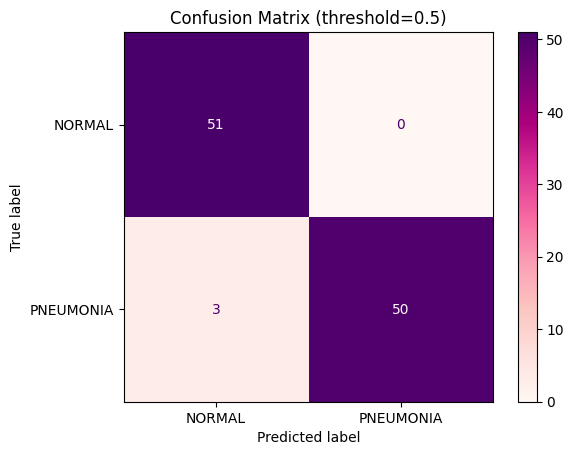

Accuracy: 97.12%


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Convert probabilities to class predictions (threshold 0.5)
preds_05 = (probs[:,1] > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(TRUE_LABELS, preds_05)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap='RdPu')
plt.title("Confusion Matrix (threshold=0.5)")
plt.show()

# Optional: Print some metrics
accuracy = np.mean(preds_05 == np.array(TRUE_LABELS))
print(f"Accuracy: {accuracy*100:.2f}%")


Saving IM-0003-0001.jpeg to IM-0003-0001.jpeg


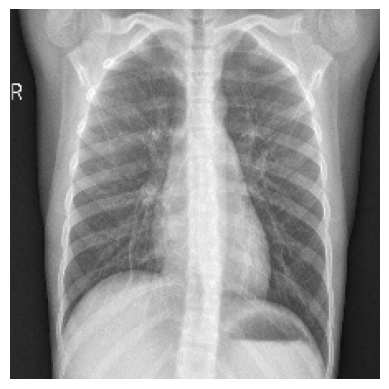

Pneumonia probability = 0.184
Prediction: NORMAL


In [36]:
uploaded = files.upload()
if uploaded:
    up_name = next(iter(uploaded))
    img_up  = Image.open(up_name).convert("RGB")
    plt.imshow(img_up); plt.axis('off'); plt.show()

    tensor = transform(img_up).unsqueeze(0).to(device)
    with torch.no_grad():
        p = torch.softmax(model(tensor), dim=1)[0,1].item()
    print(f"Pneumonia probability = {p:.3f}")
    print("Prediction:", "PNEUMONIA" if p>0.5 else "NORMAL")

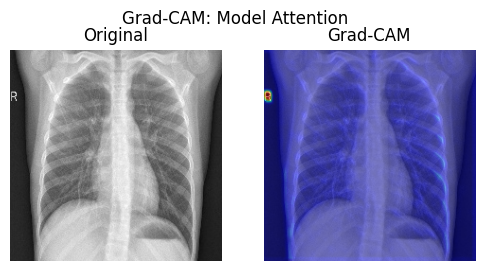

In [37]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layer = model.conv2

input_tensor = transform(img_up).unsqueeze(0).to(device)

cam = GradCAM(model=model, target_layers=[target_layer])

grayscale_cam = cam(input_tensor=input_tensor)[0]
img_np = np.array(img_up.resize((224,224)), dtype=np.float32)/255.0
heatmap = show_cam_on_image(img_np, grayscale_cam, use_rgb=True)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1); plt.imshow(img_np); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(heatmap); plt.title("Grad-CAM"); plt.axis('off')
plt.suptitle("Grad-CAM: Model Attention")
plt.show()